## ThinkDSP

This notebook contains code examples from Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)


In [1]:
import thinkdsp
import matplotlib.pyplot as plt

### Read a wave

`read_wave` reads WAV files.  The WAV examples in the book are from freesound.org.  In the contributors section of the book, I list and thank the people who uploaded the sounds I use.

In [2]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')

In [3]:
wave.make_audio()

I pulled out a segment of this recording where the pitch is constant.  When we plot the segment, we can't see the waveform clearly, but we can see the "envelope", which tracks the change in amplitude during the segment.

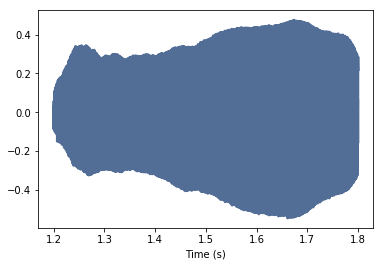

In [4]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
plt.xlabel('Time (s)');

### Spectrums

Wave provides `make_spectrum`, which computes the spectrum of the wave.

In [5]:
spectrum = segment.make_spectrum()

Spectrum provides `plot`

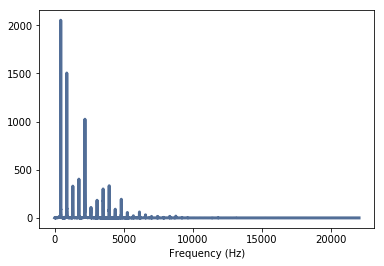

In [6]:
spectrum.plot()
plt.xlabel('Frequency (Hz)');

The frequency components above 10 kHz are small.  We can see the lower frequencies more clearly by providing an upper bound:

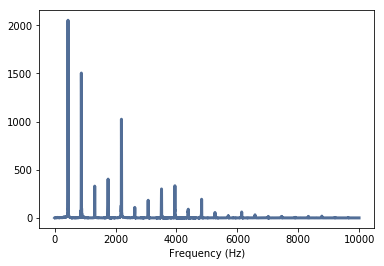

In [7]:
spectrum.plot(high=10000)
plt.xlabel('Frequency (Hz)');

Spectrum provides `low_pass`, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

In [8]:
spectrum.low_pass(3000)

The result is a spectrum with fewer components.

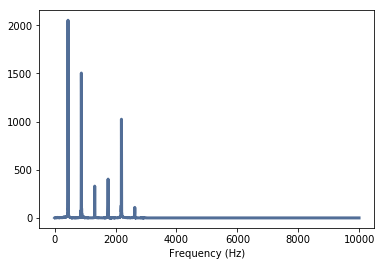

In [9]:
spectrum.plot(high=10000)
plt.xlabel('Frequency (Hz)');

We can convert the filtered spectrum back to a wave:

In [10]:
filtered = spectrum.make_wave()

Now we can listen to the original segment and the filtered version.

In [11]:
segment.make_audio()

In [12]:
filtered.make_audio()

The original sounds more complex, with some high-frequency components that sound buzzy.

The filtered version sounds more like a pure tone, with a more muffled quality.

The cutoff frequency I chose, 3000 Hz, is similar to the quality of a telephone line, so this example simulates the sound of a violin recording played over a telephone.

### Interaction

The following shows the same example using interactive IPython widgets.

In [13]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot()
    plt.xlabel('Frequency (Hz)');
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

Adjust the sliders to control the start and duration of the segment and the cutoff frequency applied to the spectrum.

In [14]:
from ipywidgets import interact, fixed
from IPython.display import display

wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…